In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
%cd '/content/drive/MyDrive/Python/'

[WinError 3] The system cannot find the path specified: "'/content/drive/MyDrive/Python/'"
C:\Users\frz


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.isnull().sum()

age         0
Gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
duplicate_data = data.duplicated().any()
duplicate_data

True

In [7]:
data = data.drop_duplicates()
duplicate_data = data.duplicated().any()
duplicate_data

False

In [8]:
categorical_values = []
numerical_values = []
for column in data.columns:
  if data[column].nunique() <= 10:
    categorical_values.append(column)
  else:
    numerical_values.append(column)

In [9]:
categorical_values


['Gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
numerical_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
print("Gender unique data",data['Gender'].unique())
print("cp unique data",data['cp'].unique())
print("fbs unique data",data['fbs'].unique())
print("restecg unique data",data['restecg'].unique())
print("exang unique data",data['exang'].unique())
print("slope unique data",data['slope'].unique())
print("ca unique data",data['ca'].unique())
print("thal unique data",data['thal'].unique())
print("target unique data",data['target'].unique())



Gender unique data [1 0]
cp unique data [0 1 2 3]
fbs unique data [0 1]
restecg unique data [1 0 2]
exang unique data [0 1]
slope unique data [2 0 1]
ca unique data [2 0 1 3 4]
thal unique data [3 2 1 0]
target unique data [0 1]


In [12]:
categorical_values.remove('Gender')
categorical_values.remove('fbs')
categorical_values.remove('exang')
categorical_values.remove('target')
#data = pd.get_dummies(data,columns = categorical_values,drop_first = True)

In [13]:
data.head()

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[numerical_values] = st.fit_transform(data[numerical_values])

In [15]:
data.head()

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [16]:
X = data.drop('target',axis = 1)
Y = data['target']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(x_train,y_train)
y_predict1 = log.predict(x_test)
accuracy_score(y_test,y_predict1)

0.7868852459016393

In [19]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
y_predict2 = svm.predict(x_test)
accuracy_score(y_test,y_predict2)

0.8360655737704918

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_predict3 = knn.predict(x_test)
accuracy_score(y_test,y_predict3)

0.7704918032786885

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict4= rf.predict(x_test)
accuracy_score(y_test,y_predict4)

0.8524590163934426

In [22]:
final_data = pd.DataFrame({'Models':['LR','svm','KNN','RF'],
                          'Accuracy':[accuracy_score(y_test,y_predict1),
                                      accuracy_score(y_test,y_predict2),
                                      accuracy_score(y_test,y_predict3),
                                      accuracy_score(y_test,y_predict4)]})
final_data


,Models,Accuracy
0,LR,0.786885
1,svm,0.836066
2,KNN,0.770492
3,RF,0.852459


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

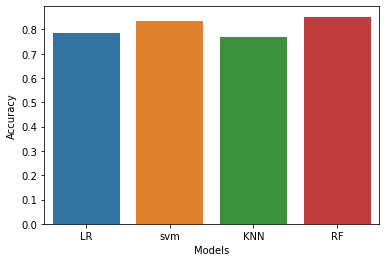

In [24]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])


In [25]:
new_data = pd.DataFrame({
    'age':52,
    'Gender':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index = [0])

In [26]:
new_data

,age,Gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [27]:
X = data.drop('target',axis = 1)
Y = data['target']

In [28]:
rf.fit(X,Y)

RandomForestClassifier()

In [29]:
pre = rf.predict(new_data)
if pre[0] == 0:
  print("No Disease")
else:
  print('Disease')

No Disease


In [30]:
import joblib
import pickle

In [31]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [32]:
model = joblib.load('model_joblib_heart')

In [33]:
model.predict(new_data)

array([0], dtype=int64)

# Model Analysis for RF

In [34]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict4)

'              precision    recall  f1-score   support\n\n           0       0.90      0.81      0.85        32\n           1       0.81      0.90      0.85        29\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.86      0.85      0.85        61\n'

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
y_pred = model.predict(x_test)
print(y_pred)

[1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1]


In [37]:
cm = confusion_matrix(y_test,y_pred.round())

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

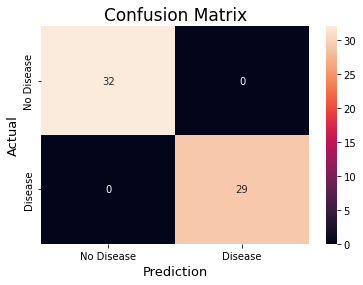

In [39]:
#Plot the confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [40]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy   :", accuracy)

Accuracy   : 1.0


In [41]:
precision = precision_score(y_test, y_pred.round())
print("Precision :", precision)

Precision : 1.0


In [42]:
recall = recall_score(y_test, y_pred.round())
print("Recall    :", recall)

Recall    : 1.0


In [43]:
F1_score = f1_score(y_test, y_pred.round())
print("F1-score  :", F1_score)

F1-score  : 1.0


# Model Analysis for SVM

In [44]:
joblib.dump(svm,'model_joblib_heart')
modelSVM = joblib.load('model_joblib_heart')

In [45]:
y_pred = modelSVM.predict(x_test)
print(y_pred)

[1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1]


In [46]:
cm = confusion_matrix(y_test,y_pred.round())

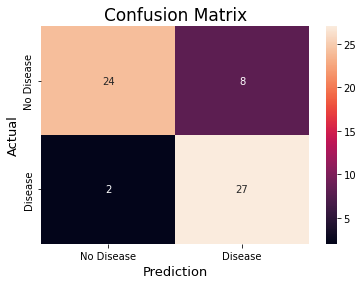

In [47]:
#Plot the confusion matrix
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [48]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy   :", accuracy)

Accuracy   : 0.8360655737704918


In [49]:
precision = precision_score(y_test, y_pred.round())
print("Precision :", precision)

Precision : 0.7714285714285715


In [50]:
recall = recall_score(y_test, y_pred.round())
print("Recall    :", recall)

Recall    : 0.9310344827586207


In [51]:
F1_score = f1_score(y_test, y_pred.round())
print("F1-score  :", F1_score)

F1-score  : 0.8437500000000001


# IoT MQTT

In [52]:
!pip install paho-mqtt

In [53]:
import paho.mqtt.client as mqtt
from random import randrange, uniform
import time

def publish(body, txt):
    mqttBroker = "mqtt-dashboard.com"
    client = mqtt.Client("patient")
    client.connect(mqttBroker)
    client.publish("Disease Prediction", body)
    print("Just published \"" + txt + "\" to Topic Disease Prediction")
    time.sleep(1)

# E-Mail

In [54]:
!pip install yagmail

In [55]:
import os
from datetime import datetime
from datetime import date
import yagmail

In [56]:
def automail(receiver, body):
    #date = datetime.date.today().strftime("%B %d, %Y")
    #path = 'D:/UNI/Year 3/Semester 1/Artificial Intelligence for Engineering/Project/Attendance_System/Attendance'
    #os.chdir(path)
    files = sorted(os.listdir(os.getcwd()), key=os.path.getmtime)
    #newest = files[-1]
    #filename = newest
    sub = "Heart Disease Result" #+ str(date)
    # mail information
    yag = yagmail.SMTP("maiakram2001@gmail.com", password = "xqjxekkmhpzdsaml")#oauth2_file="~/oauth2_creds.json")

    # sent the mail
    yag.send(
        to=receiver,
        subject=sub,           # email subject
        contents=body,         # email body
    )
    print("Email Sent!")

# GUI

In [57]:
from tkinter import *

In [137]:
def show_entry_fields():
  name = n.get()
  p1 = int(e1.get())
  p2 = int(e2.get())
  p3 = int(e3.get())
  p4 = int(e4.get())
  p5 = int(e5.get())
  p6 = int(e6.get())
  p7 = int(e7.get())
  p8 = int(e8.get())
  p9 = int(e9.get())
  p10 = float(e10.get())
  p11 = int(e11.get())
  p12 = int(e12.get())
  p13 = int(e13.get())
  p14 = str(e14.get())

  model = joblib.load('model_joblib_heart')
  result = model.predict([[p1 ,p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

  body = "Dear "+name+",\n\t\t For the Case of:\nAge: "+str(p1)\
  +"\t\t Gender: "+str(p2)+"\t\t CP: "+str(p3)+"\t\t Trestbps: "+str(p4)+"\t\t Chol: "+str(p5)\
  +"\t\t FBS: "+str(p6)+"\t\t Restecg: "+str(p7)+"\t\t Thalach: "+str(p8)+"\t\t Exang: "+str(p9)+"\t\t Oldpeak: "+str(p10)\
  +"\t\t Slope: "+str(p11)+"\t\t CA: "+str(p12)+"\t\t Thal: "+str(p13)+"\nHeart Condition is: "

  if result == 0:
    txt = "No Heart Disease"
    Label(master, text = txt, font=('Helvetica', 12, ' bold ')).grid(row = 35)
  else:
    txt = "Possibility of Heart Disease"
    Label(master, text = txt, font=('Helvetica', 12, ' bold ')).grid(row = 35)

  body = body+txt
  
  automail(p14, body)
  publish(body, txt)


In [138]:
master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text = "Heart Disease Prediction System", fg="white",bg="#5B72D7" ,width=55 ,height=1,font=('Helvetica', 16, ' bold ')).grid(row = 0, columnspan = 2)

lab = ["Enter Your Name: ",
       "Enter Your Age: ",
       "Male or Female [1/0]: ",
       "Enter CP Value: ",
       "Enter Trestbps Value: ",
       "Enter Chol Value: ",
       "Enter FBS Value: ",
       "Enter Restecg Value: ", 
       "Enter Thalach Value: ",
       "Enter Exang Value: ",
       "Enter Oldpeak: ",
       "Enter Slope: ",
       "Enter CA Value: ",
       "Enter Thal Value: "]
i = 1

for t in lab:
    Label(master, text = t, fg = "white", bg="#8a2e7f",width=55 ,height=1,font=('Helvetica', 12, ' bold ')).grid(row = i)
    i+=1

Label(master, text = "Receiver Email: ", fg="white", bg="#8a2e7f",width=55 ,height=1,font=('Helvetica', 12, ' bold ')).grid(row = 15)


In [139]:
n = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e1 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e2 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e3 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e4 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e5 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e6 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e7 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e8 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e9 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e10 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e11 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e12 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e13 = Entry(master, width=15, fg="black",font=('Helvetica', 12 ))
e14= Entry(master, width=15, fg="black",font=('Helvetica', 12 ))

es = [n,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14]
j = 1
for e in es:
    e.grid(row=j, column=1)
    j+=1
    
Button(master, text='Predict', command=show_entry_fields, fg="white"  ,bg="#262523"  ,width=25  ,height=1, activebackground = "white" ,font=('Helvetica', 13, ' bold ')).grid(row = 16)

mainloop()

C:\Users\frz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Email Sent!
Just published "No Heart Disease" to Topic Disease Prediction


C:\Users\frz\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Email Sent!
Just published "No Heart Disease" to Topic Disease Prediction
